In [2]:
import pandas as pd

# CSV ÌååÏùº ÏùΩÍ∏∞
df_solar = pd.read_csv('df_merged_solar_final.csv')

In [3]:
# Îç∞Ïù¥ÌÑ∞ ÏöîÏïΩ
print("‚úÖ Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥")
print(df_solar.info())

# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print("\n‚úÖ Ïª¨ÎüºÎ≥Ñ Í≤∞Ï∏°Ïπò Ïàò")
print(df_solar.isnull().sum())

# Í∏∞Î≥∏ ÌÜµÍ≥Ñ
print("\n‚úÖ ÏàòÏπòÌòï Ïª¨Îüº Í∏∞Ïà† ÌÜµÍ≥Ñ")
print(df_solar.describe())


‚úÖ Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196890 entries, 0 to 196889
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ÏùºÏûê         196890 non-null  object 
 1   Î∞úÏ†ÑÍµ¨Î∂Ñ       196890 non-null  object 
 2   ÏÑ§ÎπÑÏö©Îüâ(MW)   196890 non-null  float64
 3   ÏãúÍ∞Ñ         196890 non-null  int64  
 4   Î∞úÏ†ÑÎüâ(kWh)   196827 non-null  float64
 5   Ïó∞Ïãù(ÎÖÑ)      196890 non-null  float64
 6   ÏßÄÏ†êÎ™Ö        196890 non-null  object 
 7   Í∏∞Ïò®(¬∞C)     196867 non-null  float64
 8   Í∞ïÏàòÎüâ(mm)    196889 non-null  float64
 9   ÌíçÏÜç(m/s)    196856 non-null  float64
 10  ÌíçÌñ•(16Î∞©ÏúÑ)   196856 non-null  float64
 11  ÏäµÎèÑ(%)      196845 non-null  float64
 12  ÏùºÏÇ¨(MJ/m2)  196889 non-null  float64
 13  Ï†ÅÏÑ§(cm)     196889 non-null  float64
 14  ÌïòÎäòÏÉÅÌÉú       187736 non-null  float64
 15  ÌÉúÏñëÍ≥†ÎèÑ       196890 non-null  float64
 16  Î∞©ÏúÑÍ∞Å        99467 no

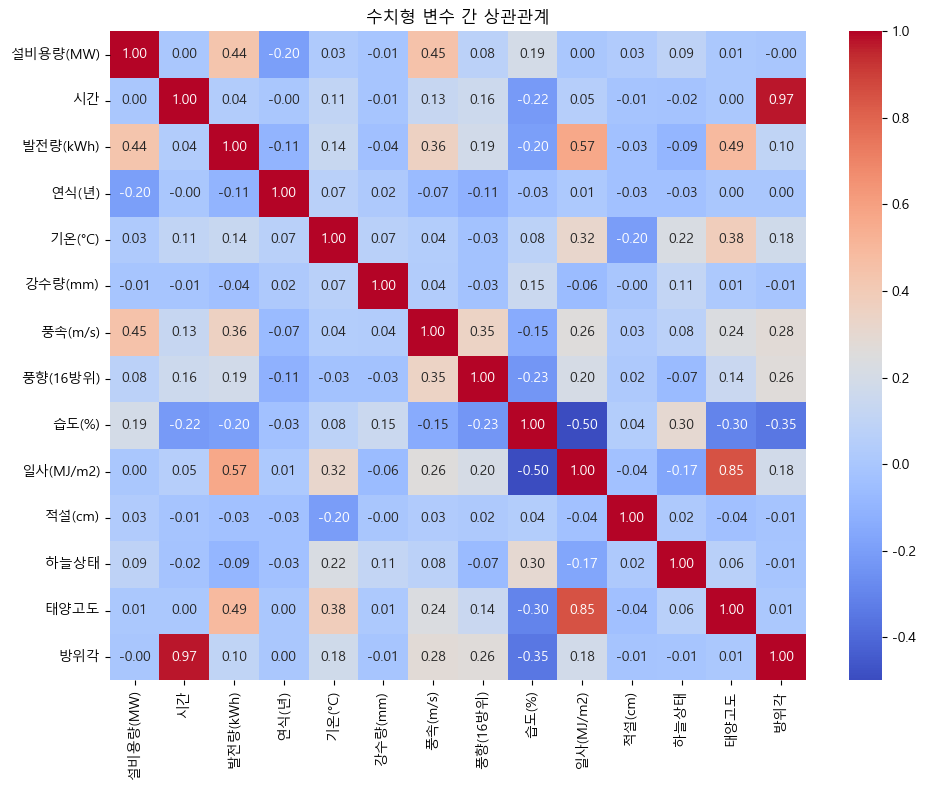

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Ïö¥ÏòÅÏ≤¥Ï†úÎ≥Ñ ÏûêÎèô Í∞êÏßÄ)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # ÏúàÎèÑÏö∞Ïö©
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')    # Îß•Ïö©
else:
    plt.rc('font', family='NanumGothic')    # Î¶¨ÎàÖÏä§Ïö© (NanumGothic ÏÑ§Ïπò ÌïÑÏöî)

plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

plt.figure(figsize=(10, 8))
sns.heatmap(df_solar.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('ÏàòÏπòÌòï Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')
plt.tight_layout()
plt.show()


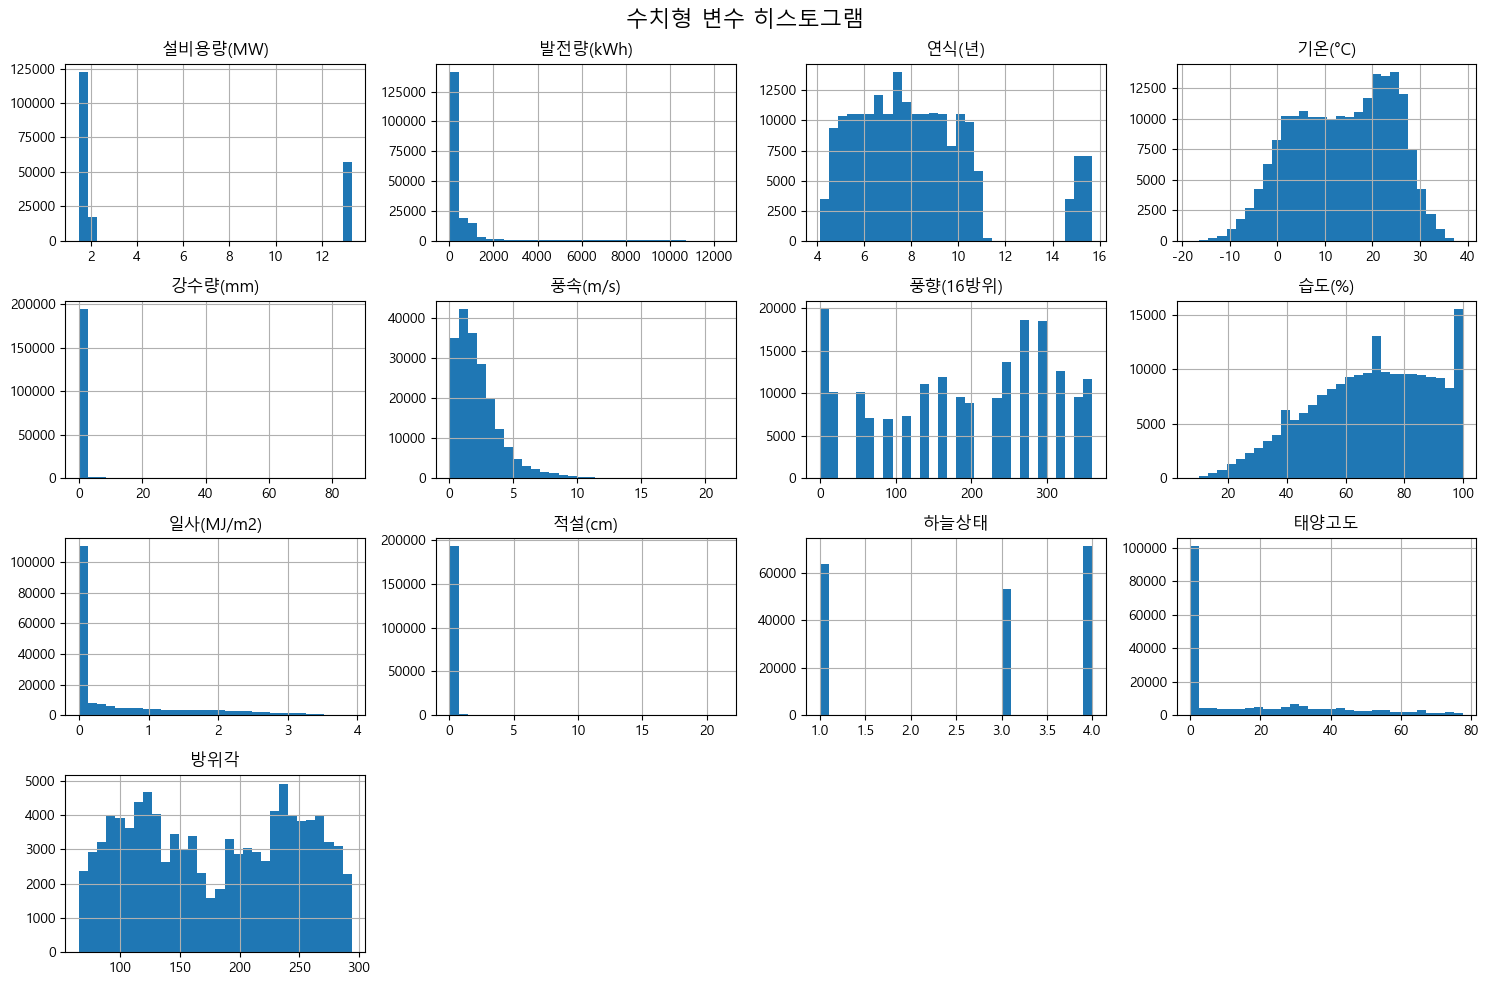

In [21]:
import matplotlib.pyplot as plt

# 1. ÏàòÏπòÌòï Ïª¨Îüº ÏûêÎèô ÌÉêÏÉâ
num_cols = df_solar.select_dtypes(include=['float64', 'int64']).columns

# 2. ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í≥† figure Ï†ÄÏû•
fig = df_solar[num_cols].hist(bins=30, figsize=(15, 10))  # ‚Üê figÎäî Axes Í∞ùÏ≤¥ Î∞∞Ïó¥
plt.suptitle("ÏàòÏπòÌòï Î≥ÄÏàò ÌûàÏä§ÌÜ†Í∑∏Îû®", fontsize=16)
plt.tight_layout()
plt.savefig("df_solar_ÌûàÏä§ÌÜ†Í∑∏Îû®.png", dpi=300)
plt.show()


In [18]:
def summarize_unique_values_full(df, threshold=50):
    print("‚úÖ Ïª¨ÎüºÎ≥Ñ Ïú†ÎãàÌÅ¨ Í∞í Î∞è Í∞úÏàò ÏöîÏïΩ\n")
    
    for col in df.columns:
        unique_vals = df[col].dropna().unique()
        nunique = len(unique_vals)
        
        print(f"\nüîπ {col} ({df[col].dtype}) ‚Üí Í≥†Ïú†Í∞í {nunique}Í∞ú")

        if nunique > threshold:
            print("   ‚Æë Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞Î°ú ÌåêÎã®Îê® (Í≥†Ïú†Í∞í 50Í∞ú Ï¥àÍ≥º)\n")
        else:
            value_counts = df[col].value_counts(dropna=True)
            for val, count in value_counts.items():
                print(f"   ‚Ä¢ {val} : {count}Í∞ú")

# Ïã§Ìñâ
summarize_unique_values_full(df_solar)


‚úÖ Ïª¨ÎüºÎ≥Ñ Ïú†ÎãàÌÅ¨ Í∞í Î∞è Í∞úÏàò ÏöîÏïΩ


üîπ ÏùºÏûê (datetime64[ns]) ‚Üí Í≥†Ïú†Í∞í 2557Í∞ú
   ‚Æë Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞Î°ú ÌåêÎã®Îê® (Í≥†Ïú†Í∞í 50Í∞ú Ï¥àÍ≥º)


üîπ Î∞úÏ†ÑÍµ¨Î∂Ñ (object) ‚Üí Í≥†Ïú†Í∞í 5Í∞ú
   ‚Ä¢ ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb : 56934Í∞ú
   ‚Ä¢ ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë : 56886Í∞ú
   ‚Ä¢ ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë : 56814Í∞ú
   ‚Ä¢ (Íµ∞ÏÇ∞)ÏÇºÎûëÏßÑÌÉúÏñëÍ¥ë : 17520Í∞ú
   ‚Ä¢ ÌÉúÏïà#9,10 ÏàòÏÉÅÌÉúÏñëÍ¥ë : 8736Í∞ú

üîπ ÏÑ§ÎπÑÏö©Îüâ(MW) (float64) ‚Üí Í≥†Ïú†Í∞í 5Í∞ú
   ‚Ä¢ 13.296 : 56934Í∞ú
   ‚Ä¢ 1.49 : 56886Í∞ú
   ‚Ä¢ 1.628 : 56814Í∞ú
   ‚Ä¢ 2.0 : 17520Í∞ú
   ‚Ä¢ 1.836 : 8736Í∞ú

üîπ ÏãúÍ∞Ñ (int32) ‚Üí Í≥†Ïú†Í∞í 24Í∞ú
   ‚Ä¢ 0 : 8221Í∞ú
   ‚Ä¢ 2 : 8203Í∞ú
   ‚Ä¢ 23 : 8203Í∞ú
   ‚Ä¢ 22 : 8203Í∞ú
   ‚Ä¢ 21 : 8203Í∞ú
   ‚Ä¢ 20 : 8203Í∞ú
   ‚Ä¢ 19 : 8203Í∞ú
   ‚Ä¢ 18 : 8203Í∞ú
   ‚Ä¢ 17 : 8203Í∞ú
   ‚Ä¢ 16 : 8203Í∞ú
   ‚Ä¢ 15 : 8203Í∞ú
   ‚Ä¢ 14 : 8203Í∞ú
   ‚Ä¢ 1 : 8203Í∞ú
   ‚Ä¢ 12 : 8203Í∞ú
   ‚Ä¢ 11 : 8203Í∞ú
   ‚Ä¢ 10 : 8203Í∞ú
   ‚Ä¢ 9 : 8203Í∞ú
   ‚